In [385]:
import numpy as np
import os
import pyvisa as pv
from matplotlib import pyplot as plt
%matplotlib widget

In [386]:
rm = pv.ResourceManager()
all_instr = rm.list_resources()

In [387]:
osc = rm.open_resource('USB0::0x1AB1::0x04CE::DS1ZD212100403::INSTR')
osc

<'USBInstrument'('USB0::0x1AB1::0x04CE::DS1ZD212100403::0::INSTR')>

In [390]:
osc.write(':WAV:SOUR CHAN2')
osc.write(':WAV:MODE RAW')
osc.write(':WAV:FORM BYTE')
osc.write(':WAV:STAR 1')
osc.write(':WAV:STOP 55001')
osc.write(':WAV:DATA?')

12

In [384]:
osc.write(':RUN')
osc.write(':TIM:MAIN:SCAL 0.000200000')
osc.write(':ACQ:MDEP 60000')
osc.write(':TIM:OFFS 0.001')
osc.write(':SING')

7

In [377]:
osc.query(':TRIG:POS?')

'5000\n'

55013


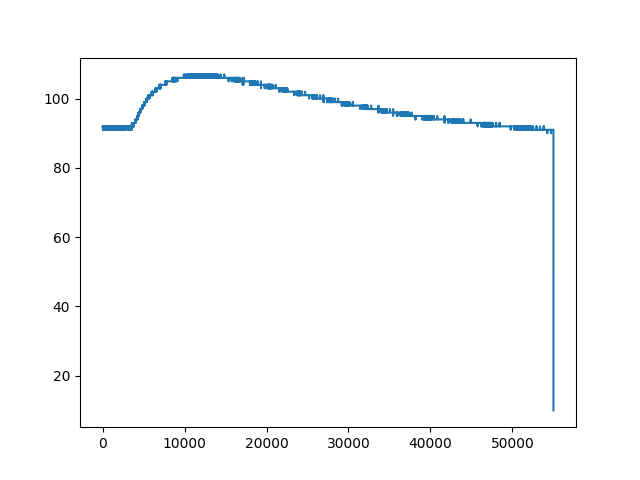

In [391]:
data = osc.read_raw()
print(len(data))
plot_data = np.frombuffer(data, dtype=np.uint8)
ax = plt.subplot()
ax.clear()
ax.plot(plot_data[12:])
plt.show()

In [8]:
import numpy as np
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x = np.linspace(0,1,100).reshape((1,-1))
grid_y = np.linspace(0, 1, 100).reshape((-1,1))

rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

In [9]:
from scipy.interpolate import griddata
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic', fill_value = 0)

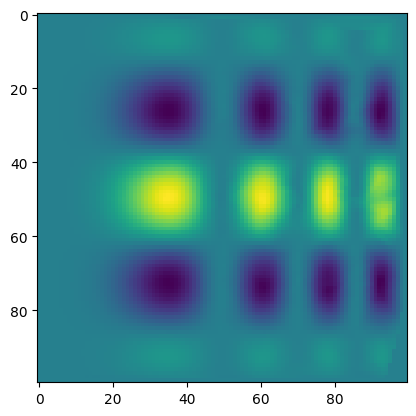

In [10]:
import matplotlib.pyplot as plt
plt.imshow(grid_z2.T)
plt.show()